Описание задания:
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.
Этапы работы:

    1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
    2. Проведите первичный анализ.
        а) Проверьте количество записей для каждого класса. Сделайте вывод.
    3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
    4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
    5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).
    6. Обработайте выбросы в данных.
        а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?
        b) Исследуйте признаки на выбросы несколькими способами.
        c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.
    7. Повторите п. 4, п. 5.
    8. Сформулируйте выводы по проделанной работе.
        а) Кратко опишите, какие преобразования были сделаны с данными.
        b) Сравните точность двух моделей.
        c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.
    Для получения зачета по этому домашнему заданию минимально должны быть реализованы методы по поиску выбросов и построены две модели: «до» и «после» обработки экстремальных значений.

In [1]:
# импорт библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.ensemble import IsolationForest

In [2]:
# загружаю данные
df = pd.read_csv("./HW_data/glass.xls")
# df.info()
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# первичный анализ
# df.info() # пропусков нет
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


В целом датасет выглядит адекватно, пропусков нет, барий и железо содержатся в небольшом количестве стёкол, предполагаю, что это специфика самих видов стёкол.

In [52]:
# делю данные, обучаю модель, считаю точность
X = df.drop(columns='Type')
Y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
score_full = forest.score(X_test, y_test)
score_full

0.8372093023255814

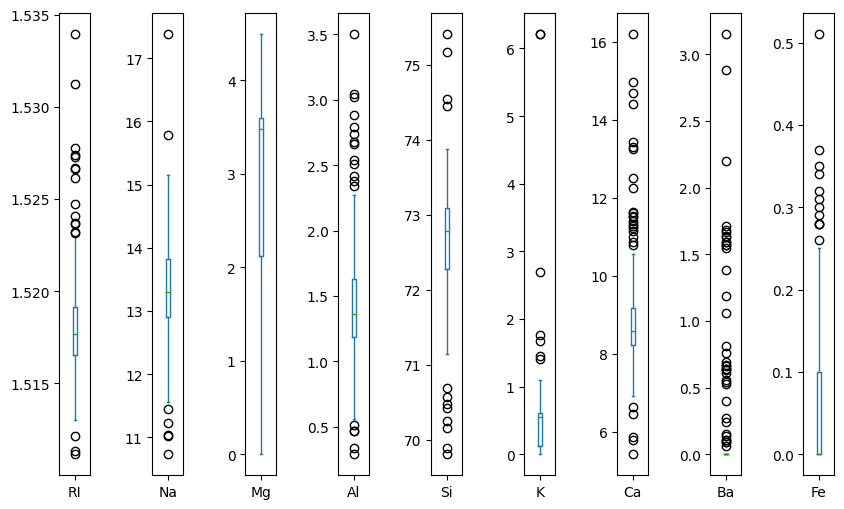

In [5]:
# смотрю выбросы
X.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
)
plt.subplots_adjust(wspace=2) 
plt.show()

К признакам с нормальным распределением можно отнести Na, Mg, Al и Si.<br>
Ba почти полностью состоит из выбросов, однако, как было написано выше, я бы не относил это именно как к выбросам, скорее это состав определённых видов стёкол.<br>

In [53]:
# удаляю выбросы через межквартильный разброс
# работает, но удаляет слишком много значений
Q1 = X.quantile(q=.25)
Q3 = X.quantile(q=.75)
IQR = X.apply(stats.iqr)
Xc = X[~((X < (Q1-1.5*IQR)) | (X > (Q3+1.5*IQR))).any(axis=1)]
Yc = Y[Y.index.isin(Xc.index)]
print(X.shape)
print(Xc.shape)
print(Yc.shape)

(214, 9)
(136, 9)
(136,)


In [54]:
# обучаю ещё одну модель
X_train_iqr, X_test_iqr, y_train_iqr, y_test_iqr = train_test_split(Xc, Yc, test_size=0.2, random_state=42)
forest_iqr = RandomForestClassifier(random_state=42)
forest_iqr.fit(X_train_iqr, y_train_iqr)
score_iqr = forest.score(X_test_iqr, y_test_iqr)
score_iqr

0.9642857142857143

Сработало, но отсекло достаточно много значений.
Тем не менее, обучаю ещё одну модель и считаю точность - точность зашкаливает.

In [7]:
# ищу выбросы с помощью IsolationForest
clf = IsolationForest()
clf.fit(X_train, y_train) # обучение

clf_pred_outliers = clf.predict(X)

clf_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
        1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1, -1,  1, -1,  1,  1])

In [58]:
# # удаляю выбросы из выборки
X1 = X.copy()
X1['Outliers'] = clf_pred_outliers
X1 = X1[X1['Outliers'] == 1]
X1.drop(columns='Outliers', inplace=True)
Y1 = Y[Y.index.isin(X1.index)]
X1.shape

(186, 9)

In [60]:
# обучаю ещё одну модель
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X1, Y1, test_size=0.2, random_state=42)
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_clf, y_train_clf)
score_clf = forest.score(X_test_clf, y_test_clf)
score_clf

0.9736842105263158

In [63]:
# вывыожу точность для всех моделей
print(f"полные данные: {score_full}")
print(f"без выбросов по IQR: {score_iqr}")
print(f"без выбросов по IsolationForest: {score_clf}")

полные данные: 0.8372093023255814
без выбросов по IQR: 0.9642857142857143
без выбросов по IsolationForest: 0.9736842105263158


Вывады: формально модель без выборосов, убранных при помощи IsolationForest показывает самую высоку точность, однако в данном случае выбросы не являются выбросами, а, скорее, особенностями определённых типов стёкол. По моему мнению, выбросы нужно удалять в случае, если они показывают совсем неадекватные значения и мы понимаем, почему, либо, если данных очень много и мы можем довериться модели в определеннии того, что является выбросом. Если переусердствовать, то в модели останутся только усреднённые данные, и не останется редко встречающихся, но также реальных значений, что может привести к ошибкам при дальнейшем пректическом применении модели.

Пример: есть какое-то особо прочное стекло с содержанием железа 15%, в датасете его 1-2 штуки - по формальным признакам чистый выброс, однако в будущем, модель не сможет определять этот тип.